In [12]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for security purposes, login credentials stored in variable 'postgrescred'
from config import postgrescred

#connect to the specific database containing the employee data tables
engine = create_engine(postgrescred)
conn = engine.connect()

In [13]:
#bring the salaries table and convert it to a pandas dataframe
df=pd.read_sql("select * from salaries", conn)
#bring the titles table and convert it to a pandas dataframe
df1=pd.read_sql("select * from titles", conn)
print(df.head(5))
print(df1.head(5))

   emp_no  salary   from_date     to_date
0   10001   60117  1986-06-26  1987-06-26
1   10002   65828  1996-08-03  1997-08-03
2   10003   40006  1995-12-03  1996-12-02
3   10004   40054  1986-12-01  1987-12-01
4   10005   78228  1989-09-12  1990-09-12
   emp_no            title   from_date     to_date
0   10001  Senior Engineer  1986-06-26  9999-01-01
1   10002            Staff  1996-08-03  9999-01-01
2   10003  Senior Engineer  1995-12-03  9999-01-01
3   10004         Engineer  1986-12-01  1995-12-01
4   10004  Senior Engineer  1995-12-01  9999-01-01


In [14]:
# Use inner join on emp_no into a single dataset
combinedata=pd.merge(df,df1,on ='emp_no',how ='outer')
combinedata.sort_values(by=['salary'],inplace=True, ascending=False)
print(combinedata.head(5))


        emp_no  salary from_date_x   to_date_x         title from_date_y  \
155577  205000  129492  1991-10-12  1992-10-11  Senior Staff  1999-10-12   
155578  205000  129492  1991-10-12  1992-10-11         Staff  1991-10-12   
50526    44188  127238  1991-03-16  1992-03-15  Senior Staff  1991-03-16   
361774  444756  127041  1999-06-14  2000-06-13         Staff  1999-06-14   
381825  458302  126703  1998-10-05  1999-10-05         Staff  1998-10-05   

         to_date_y  
155577  9999-01-01  
155578  1999-10-12  
50526   9999-01-01  
361774  9999-01-01  
381825  9999-01-01  


In [8]:
%matplotlib inline

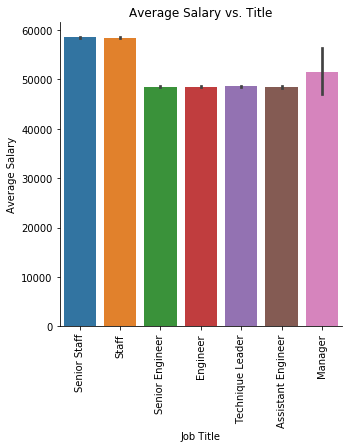

In [15]:
#plot for graduation outcomes based on english proficiency
fg1 = sns.catplot(x='title', y='salary',  
                        data=combinedata, kind='bar')
fg1.set_xlabels('')
plt.xticks(rotation=90)
fg1.set_ylabels('')
plt.title("Average Salary vs. Title")
fg1.set_axis_labels('Job Title', 'Average Salary')
fg1.savefig("BarGraph-SalaryTitle.jpeg")